In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [33]:
m=1
c=0
#learning rate
L=0.0001
epoch=100
epoch_count_list=[]
epoch_error_list=[]

In [28]:
data=pd.read_csv('data.csv', header=0)

In [29]:
X=data['size_in_sq_ft']
Y=data['price_x1000_sh']
N=float(len(X))

In [30]:
def mse(N, Y,Y_hat):
    return (1/N)*sum(Y-Y_hat)**2

In [38]:
#get line of best fit
def gradient_descent_fit(m, c, N, L):
    epoch_count_list=[]
    epoch_error_list=[]
    for i in range(epoch):
        Y_hat=m*X+c
        
        epoch_count_list=epoch_count_list[:]
        epoch_count_list.append(i)
        
        epoch_error=mse(N, Y,Y_hat)
        
        epoch_error_list=epoch_error_list[:]
        epoch_error_list.append(epoch_error)
        
        #derrivate with respect to m
        D_m=(-2/N)*sum(X*(Y-Y_hat))
        
        #derrivate with respect to m L1 regression
        D_m=(-2/N)*sum(X*(Y-Y_hat)) - (1.5 * m/abs(m))
        
        #derrivate with respect to m L2 regression
        D_m=(-2/N)*sum(X*(Y-Y_hat)) -(2* 1.5 * m/abs(m))
        
        #derrivate with respect to c
        D_c=(-2/N)*sum(Y-Y_hat)
        
        m=m-(L*D_m)
        c=c-(L*D_c)    
        
    print('Final M is ', m,' Final c is ' ,c)
    return Y_hat,epoch_count_list,epoch_error_list


Final M is  1.4794952303588504  Final c is  0.01515400542226122


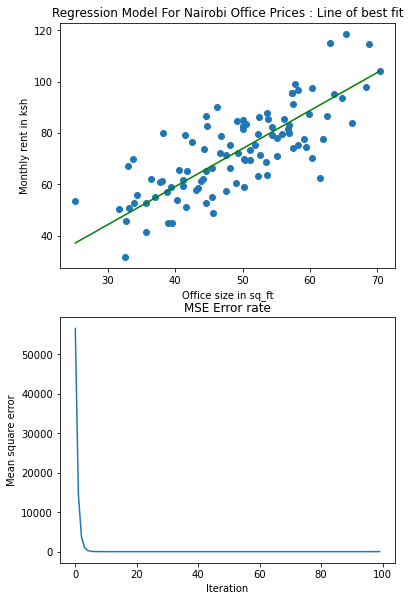

In [40]:
parameters= gradient_descent_fit(m,c,N,L)
y_predicted=parameters[0]
total_epochs=parameters[1]
all_epoch_errors=parameters[2]

fig,(ax1, ax2)=plt.subplots(2,gridspec_kw={'top':2})

ax1.set(xlabel='Office size in sq_ft')
ax1.set(ylabel='Monthly rent in ksh')
ax1.set_title('Regression Model For Nairobi Office Prices : Line of best fit')
ax1.scatter(X, Y)
ax1.plot([min(X),max(X)],[min(y_predicted),max(y_predicted)],color='green')

ax2.set_title('MSE Error rate')
ax2.set(xlabel='Iteration')
ax2.set(ylabel='Mean square error')
ax2.plot(total_epochs,all_epoch_errors)

#destroy the lists
epoch_count_list.clear()
epoch_error_list.clear()

